# Clustering Local Nigerian Foods by Nutritional Profiles

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

In [3]:
df = pd.read_excel('data/local_foods_nutritional_contents.xlsx')

df.head()

,Food,Calories,Carbohydrates,Protein,Fat,Sodium
0,Amala,130.0,27.0,1.0,0.3,20.0
1,Eba,360.0,88.0,1.2,0.3,24.0
2,Pounded Yam,267.0,63.0,2.0,0.6,4.0
3,Semovita,360.0,73.0,10.0,1.2,20.0
4,Jollof Rice,144.5,27.5,2.6,2.7,5.7


In [4]:
X = df.drop('Food', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

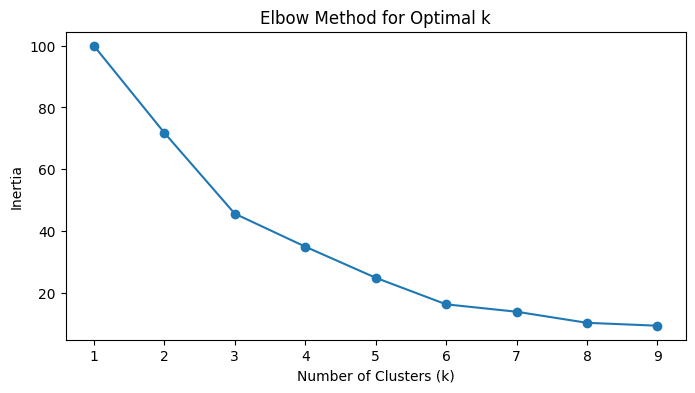

In [5]:
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

In [23]:
tsne = TSNE(n_components=2, perplexity=5, learning_rate=200,
            n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


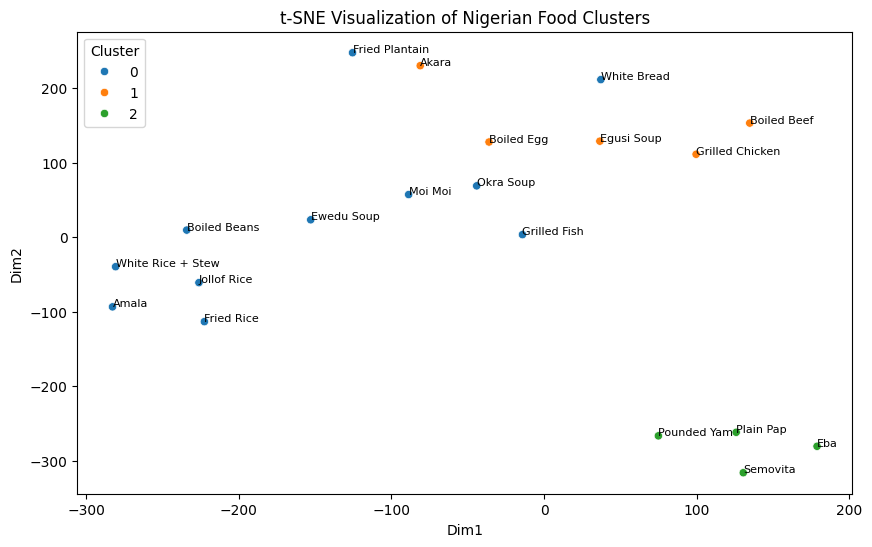

In [24]:
df['Dim1'] = X_tsne[:, 0]
df['Dim2'] = X_tsne[:, 1]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Dim1', y='Dim2',
                hue='Cluster', palette='tab10')

for i in range(df.shape[0]):
    plt.text(df['Dim1'][i], df['Dim2'][i], df['Food'][i], fontsize=8)
plt.title('t-SNE Visualization of Nigerian Food Clusters')
plt.show()